In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [107]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [108]:
df = pd.read_csv("../../Own_model/data_csv/Admission_Predict.csv")

In [109]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [111]:
df.duplicated().sum()

np.int64(0)

In [112]:
df.drop(columns='Serial No.', inplace=True)

In [113]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [115]:
x_train.shape

(400, 7)

In [116]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [117]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [118]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [121]:
history = model.fit(x_train_scaled, y_train, epochs=120, validation_split=0.2)

Epoch 1/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.5792 - val_loss: 0.4452
Epoch 2/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3815 - val_loss: 0.2814
Epoch 3/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2452 - val_loss: 0.1566
Epoch 4/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1266 - val_loss: 0.0736
Epoch 5/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0641 - val_loss: 0.0296
Epoch 6/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0254 - val_loss: 0.0160
Epoch 7/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - val_loss: 0.0152
Epoch 8/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - val_loss: 0.0149
Epoch 9/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0138 - val_loss: 0.0135
Epoch 10/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - val_loss: 0.0123
Epoch 11/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0104 - val_loss: 0.0116
Epoch 12/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

In [122]:
predictions = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 


In [123]:
r2_score(y_test, predictions)

0.8120952213955541

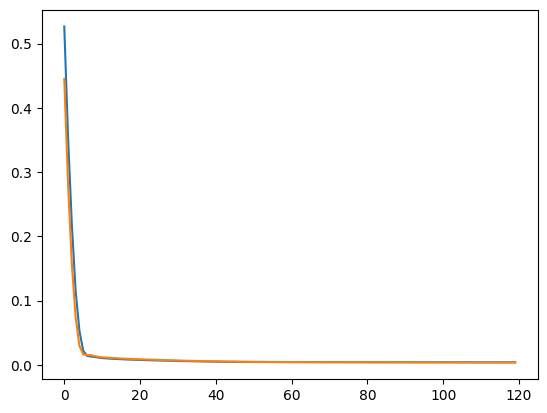

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()